In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
# Set the random seed for reproducibility
np.random.seed(259)

# Create data for each area
def create_area_data(mean_hours, sd_hours, mean_income, sd_income, n, area_name):
    hours = np.random.normal(mean_hours, sd_hours, n)
    income = np.abs(hours * np.random.normal(mean_income, sd_income, n))
    return pd.DataFrame({'Area': area_name, 'Hours': hours, 'Income': income})

In [3]:
# Creating data frames for each area
AreaSD = create_area_data(90, 15, 120, 10, 100, 'AreaSD')
AreaLA = create_area_data(100, 16, 100, 8, 90, 'AreaLA')
AreaB = create_area_data(120, 20, 75, 6, 110, 'AreaB')
AreaI = create_area_data(170, 16, 50, 5, 80, 'AreaI')
AreaR = create_area_data(190, 14, 45, 4, 75, 'AreaR')

# Combine all areas into one DataFrame
All = pd.concat([AreaSD, AreaLA, AreaB, AreaI, AreaR])

In [9]:
All.head()

,Area,Hours,Income
0,AreaSD,80.504685,9406.538074
1,AreaSD,94.525061,12069.047487
2,AreaSD,98.915877,12580.259218
3,AreaSD,84.446023,9612.215338
4,AreaSD,100.946028,10924.163192


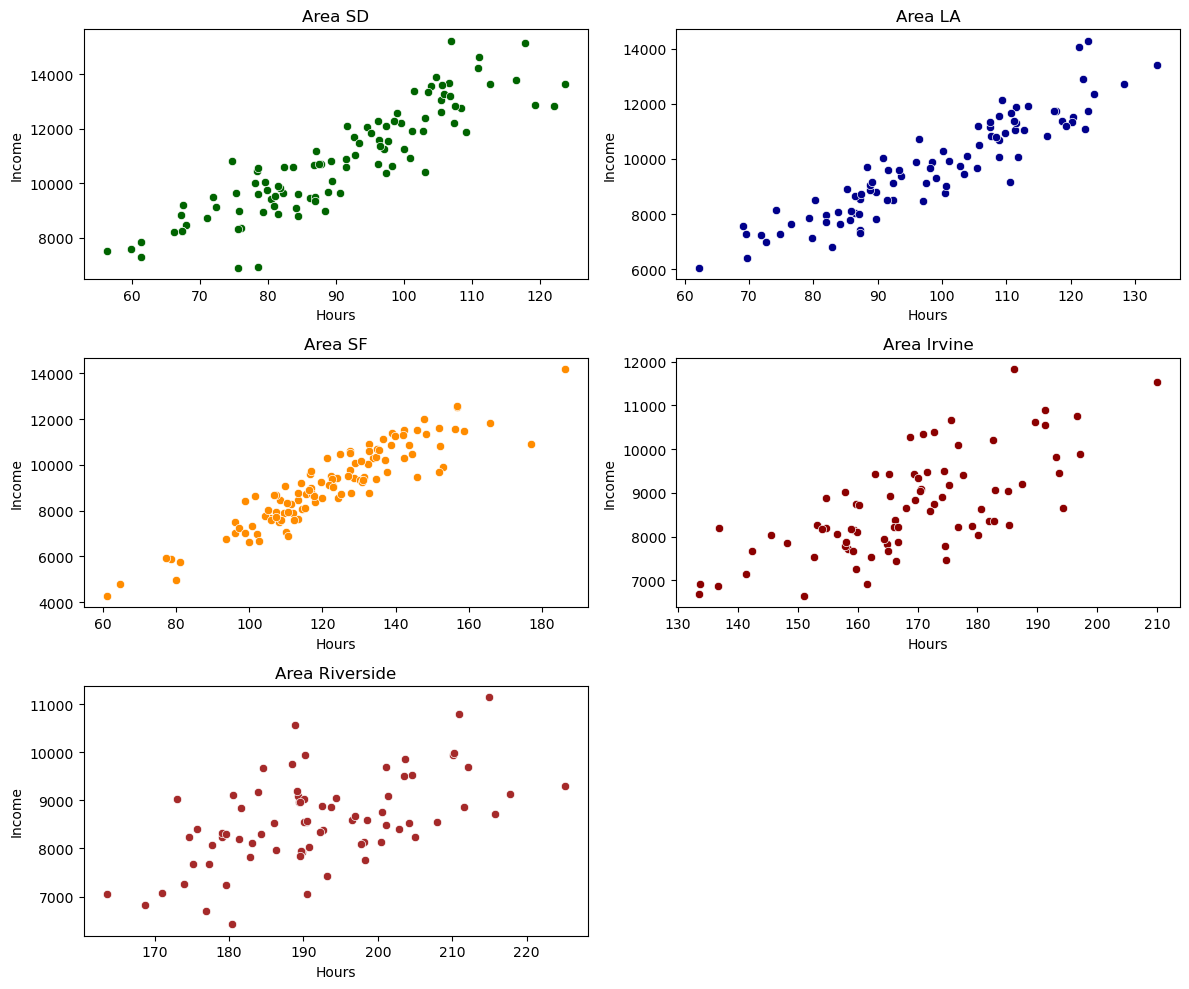

In [5]:
# Plotting
def plot_area(area_df, color, title):
    sns.scatterplot(data=area_df, x='Hours', y='Income', color=color).set_title(title)

plt.figure(figsize=(12, 10))
plt.subplot(321); plot_area(AreaSD, 'darkgreen', 'Area SD')
plt.subplot(322); plot_area(AreaLA, 'darkblue', 'Area LA')
plt.subplot(323); plot_area(AreaB, 'darkorange', 'Area SF')
plt.subplot(324); plot_area(AreaI, 'darkred', 'Area Irvine')
plt.subplot(325); plot_area(AreaR, 'brown', 'Area Riverside')
plt.tight_layout()
plt.show()

In [15]:
# Regression analysis for each area with the function defined as below
def run_regression(area_df):
    model = ols('Income ~ Hours', data=area_df).fit()
    return model.summary()



In [16]:
print(run_regression(AreaSD))

                            OLS Regression Results                            
Dep. Variable:                 Income   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     377.4
Date:                Sun, 21 Jan 2024   Prob (F-statistic):           2.24e-35
Time:                        23:40:38   Log-Likelihood:                -819.44
No. Observations:                 100   AIC:                             1643.
Df Residuals:                      98   BIC:                             1648.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    389.7487    544.647      0.716      0.4

In [17]:
print(run_regression(AreaLA))

                            OLS Regression Results                            
Dep. Variable:                 Income   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     495.7
Date:                Sun, 21 Jan 2024   Prob (F-statistic):           6.41e-38
Time:                        23:40:56   Log-Likelihood:                -716.37
No. Observations:                  90   AIC:                             1437.
Df Residuals:                      88   BIC:                             1442.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -542.7758    466.031     -1.165      0.2

In [18]:
print(run_regression(AreaB))


                            OLS Regression Results                            
Dep. Variable:                 Income   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     615.9
Date:                Sun, 21 Jan 2024   Prob (F-statistic):           2.00e-46
Time:                        23:41:00   Log-Likelihood:                -872.41
No. Observations:                 110   AIC:                             1749.
Df Residuals:                     108   BIC:                             1754.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -60.9840    375.230     -0.163      0.8

In [ ]:
print(run_regression(AreaI))


In [11]:
print(run_regression(AreaR))


                            OLS Regression Results                            
Dep. Variable:                 Income   R-squared:                       0.329
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     35.74
Date:                Sun, 21 Jan 2024   Prob (F-statistic):           7.63e-08
Time:                        23:36:40   Log-Likelihood:                -603.20
No. Observations:                  75   AIC:                             1210.
Df Residuals:                      73   BIC:                             1215.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    579.5724   1340.645      0.432      0.6

In [19]:
# Combined regression
combined_reg = ols('Income ~ Hours', data=All).fit()
print(combined_reg.summary())



                            OLS Regression Results                            
Dep. Variable:                 Income   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.802
Date:                Sun, 21 Jan 2024   Prob (F-statistic):              0.180
Time:                        23:41:11   Log-Likelihood:                -4054.4
No. Observations:                 455   AIC:                             8113.
Df Residuals:                     453   BIC:                             8121.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9797.4024    277.080     35.359      0.0

c:\Users\meala\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\meala\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


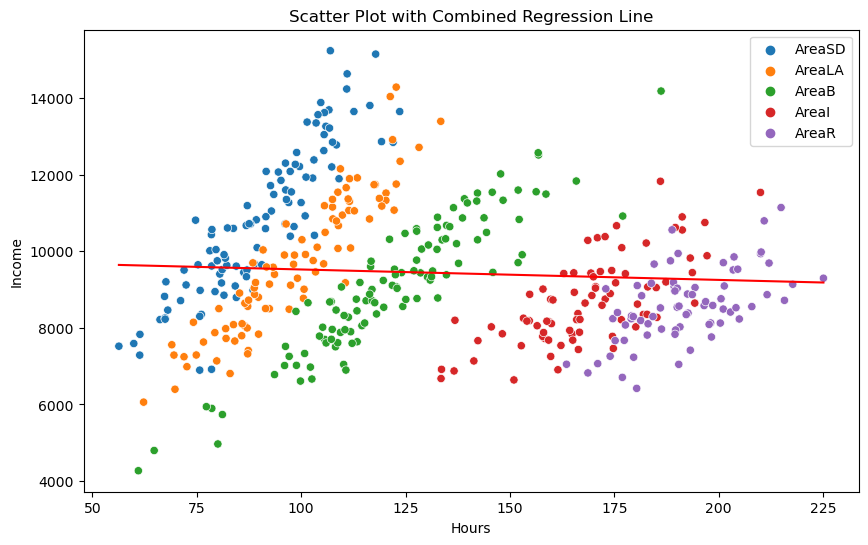

In [20]:
# Plotting with regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(data=All, x='Hours', y='Income', hue='Area')
sns.lineplot(data=All, x='Hours', y=combined_reg.predict(All), color='red')
plt.title('Scatter Plot with Combined Regression Line')
plt.show()